In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from textclustering import utilities as ut
from textclustering import tfidfModule as tfm

#change operating folder      
os.chdir("/Users/arnabborah/Documents/repositories/textclusteringDBSCAN/scripts/")
#read the .csv data file using the dataProcessor class
rp = tfm.dataProcessor("../datasets/DataAnalyst.csv")

                                  Job Description  Company Name
Industry                                                       
-1                                            353           352
IT Services                                   325           325
Staffing & Outsourcing                        323           323
Health Care Services & Hospitals              151           151
Consulting                                    111           111
...                                           ...           ...
Chemical Manufacturing                          1             1
Pet & Pet Supplies Stores                       1             1
Consumer Product Rental                         1             1
Metals Brokers                                  1             1
News Outlet                                     1             1

[89 rows x 2 columns]


In [3]:
#create a flingTFIDF object around the pre-processed daa
ftf = tfm.flingTFIDF(rp.dataInitialSmall,'Job Description')

# tokenization, customizable
ftf.smartTokenizeColumn()

# get Term Frequency of each document, and store add it as an object, in a new column
ftf.getTF()

# compute Inverse Document Frequencies across the entire vocabulary
ftf.computeIDFmatrix()

# get TFIDF, and store it as a new column in data, tf-idf
ftf.getTFIDF()

# compute sum of all tf-idf values and add it as a new column
ftf.createDistanceMetadata()

[ ================================================== ] 100.00%
Adding term frequency column based on stopsRemoved
[ ================================================== ] 100.00%
Computing list of words for IDF...

Created list of terms for IDF matrix with 27075  terms.

Computing global IDF matrix...

[ ================================================== ] 100.00%
Computing and adding TF-IDF column based on stopsRemoved
[ ================================================== ] 100.00%

In [4]:
os.chdir("/Users/arnabborah/Documents/repositories/textclusteringDBSCAN/scripts/")
ftf.data.to_pickle('../processFiles/data_tfidf_processed.pkl')
os.chdir("/Users/arnabborah/Documents/repositories/textclusteringDBSCAN/")

In [5]:
# load dataset with tf-idf vectors and load pretrained GloVe word vectors
from textclustering import flingPretrained as pre
import pandas as pd

dataProcessed = pd.read_pickle('processFiles/data_tfidf_processed.pkl')
fdb = pre.flingPretrained(dataProcessed)
fdb.loadPretrainedWordVectors('glove')

# adding glove vectors for every document
fdb.addDocumentGloveVector()


DBSCAN initialized!

Loading Glove Model

400000  words loaded!

GloVe Vectors Loaded!




flingDBSCAN initialized!

computing best distance
[ ================================================== ] 100.00%

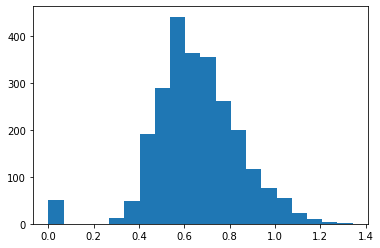


Best epsilon computed on GLOVE = 0.6544420699360174 


initiating DBSCAN Clustering with glove vectors

[                                                    ] 0.04%
 ----  cluster_1_ assigned to 565 points! ----
[                                                    ] 0.09%
 ----  cluster_2_ assigned to 855 points! ----
[                                                    ] 0.18%
 ----  cluster_3_ assigned to 58 points! ----
[                                                    ] 0.31%
 ----  cluster_4_ assigned to 119 points! ----
[                                                    ] 0.53%
 ----  cluster_5_ assigned to 109 points! ----
[                                                    ] 1.07%
 ----  cluster_6_ assigned to 53 points! ----
[                                                    ] 1.91%
 ----  cluster_7_ assigned to 37 points! ----
[ =                                                  ] 2.26%
 ----  cluster_8_ assigned to 55 points! ----
[ ===                              

In [6]:
# use DBSCAN clustering on the glove vectors loaded in the previos
from textclustering import flingDBSCAN as fdbscan

fdbscan1 = fdbscan.flingDBSCAN(fdb.data,None,25,'glove')
fdbscan1.dbscanCompute()
fdbscan1.addClusterLabel('glove-clusterID')
fdbscan1.printClusterInfo()


flingDBSCAN initialized!

computing best distance
[ ================================================== ] 100.00%

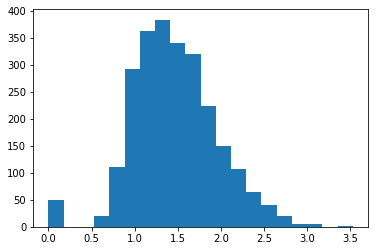


Best epsilon computed on GLOVE-TFIDF = 1.4628292329952732 


initiating DBSCAN Clustering with tfidf vectors

[                                                    ] 0.04%
 ----  cluster_1_ assigned to 810 points! ----
[                                                    ] 0.09%
 ----  cluster_2_ assigned to 695 points! ----
[                                                    ] 0.31%
 ----  cluster_3_ assigned to 61 points! ----
[                                                    ] 0.93%
 ----  cluster_4_ assigned to 347 points! ----
[ =                                                  ] 3.86%
 ----  cluster_5_ assigned to 26 points! ----
[ =============                                      ] 26.14%
 ----  cluster_6_ assigned to 44 points! ----
[ ================                                   ] 32.45%
 ----  cluster_7_ assigned to 27 points! ----
[ ================================================== ] 100.00%
 7 clusters formed!
Cluster characteristics:
 -- vectors: tfidf
 -- minP

In [7]:
# converting tf-idf into vectors
fdb.tfidf2vec('tf-only')
fdb.tfidf2vec('tf-idf')

# clustering documents based on 
fdbscan2 = fdbscan.flingDBSCAN(fdb.data,None,25,'tfidf')
fdbscan2.dbscanCompute()
fdbscan2.addClusterLabel('tfidf-clusterID')
fdbscan2.printClusterInfo() 

In [8]:
fdb.data

,Job Description,Company Name,Industry,stopsRemoved,tfMatrix,sumTFIDF,glove-vector,glove-clusterID,tfidf2vec-tf,tfidf2vec-tfidf,tfidf-clusterID
0,Are you eager to roll up your sleeves and harn...,Vera Institute of Justice\n3.2,Social Assistance,eager roll sleeves harness data drive policy c...,word tf tf-idf 0 data...,811.569328,"[0.20507256798029552, 0.05984949950738914, 0.0...",cluster_0_,"[0.2986073091133004, 0.05040200935960588, 0.09...","[0.26263354824176166, -0.023444644206149418, -...",cluster_0_
1,Overview\n\nProvides analytical and technical ...,Visiting Nurse Service of New York\n3.8,Health Care Services & Hospitals,overview provides analytical technical support...,word tf tf-idf 0 dat...,415.287583,"[0.23643422682926837, -0.055056957317073156, 0...",cluster_1_,"[0.4055475764227641, -0.07285501829268287, 0.1...","[0.35240058786555273, -0.1412004425681622, 0.0...",cluster_1_
2,Weâre looking for a Senior Data Analyst who ...,Squarespace\n3.4,Internet,weâre looking senior data analyst love mento...,word tf tf-idf 0 data ...,439.815932,"[0.155861351576923, 0.11735425461538473, -0.05...",cluster_2_,"[0.283220747730769, 0.14354892653846157, 0.044...","[0.2563749918506738, 0.17575736117618113, -0.0...",cluster_2_
3,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,Celerity\n4.1,IT Services,requisition numberrr remoteyes collaborate cre...,word tf tf-idf 0 â¢ ...,569.217931,"[0.2306739880813952, 0.09347254534883724, -0.0...",cluster_2_,"[0.29634610203488354, 0.10983982558139535, 0.0...","[0.2966705423736133, 0.028126685382837024, -0....",cluster_2_
4,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,FanDuel\n3.9,Sports & Recreation,fanduel group fanduel group worldclass team br...,word tf tf-idf 0 fanduel...,420.106719,"[0.12914707201834857, 0.11582829587155963, 0.0...",cluster_3_,"[0.17368260871559627, 0.10919291513761473, 0.0...","[0.021771101166884813, 0.16355587986765768, -0...",None
...,...,...,...,...,...,...,...,...,...,...,...
2248,Maintains systems to protect data from unautho...,"Avacend, Inc.\n2.5",Staffing & Outsourcing,maintains systems protect data unauthorized us...,word tf tf-idf 0 ...,43.940807,"[0.2738081315789473, -0.001255321052631562, 0....",None,"[0.2949110263157894, 0.029555310526315794, 0.0...","[0.23112386279259817, -0.08318866123802247, -0...",cluster_4_
2249,Position:\nSenior Data Analyst (Corporate Audi...,Arrow Electronics\n2.9,Wholesale,position senior data analyst corporate audit j...,word tf tf-idf 0 ...,439.042957,"[0.2200468355481728, 0.10710706677740867, 0.04...",cluster_1_,"[0.3396034966777404, 0.09931764750830561, 0.09...","[0.3077493047461843, 0.06387599003189207, 0.06...",cluster_1_
2250,"Title: Technical Business Analyst (SQL, Data a...",Spiceorb,-1,title technical business analyst sql data anal...,word tf tf-idf 0 busin...,205.978695,"[0.36188271052631577, 0.05400915065789475, 0.0...",cluster_2_,"[0.5060029144736842, 0.04490494473684211, 0.11...","[0.45506833532863533, 5.3025424212786644e-05, ...",cluster_2_
2251,Summary\n\nResponsible for working cross-funct...,Contingent Network Services\n3.1,Enterprise Software & Network Solutions,summary responsible working crossfunctionally ...,word tf tf-idf 0 ...,364.177527,"[0.25247974618181807, 0.07676844581818185, -0....",cluster_2_,"[0.34654995709090924, 0.07137524545454547, 0.0...","[0.27937433353352015, 0.08437047685035409, -0....",cluster_1_
